In [1]:
import sys
sys.path.insert(0,'..')
import json

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path


# Log Extraction

We find all data/result subdirectories. We then extract arguments (args.json) of the run and last epoch macro/micro scores (last row of eval_valid.csv). If the eval_valid.csv file is missing we discard the run altogether. 

The code below assembles a pandas data frame of all run IDs that are names of both log and save directories.

In [2]:
LOGS = Path('../data/results')
#LOGA = [Path('../data/log/conll04_bert_train_A'),Path('../data/log/conll04_rob_train_A'),Path('../data/log/docRed_bert_train_A')]
LOGA = [x  for x in Path('../data/log/').iterdir() if x.is_dir() and '_train_A' in str(x.name)]

#SAVES = Path('../data/save')
MAXROWS = 300
TOPROWS = 10
pd.set_option('display.max_rows', MAXROWS)

In [3]:
logEvalLabels = {x.name : x for x in LOGS.iterdir() if x.is_dir() and 'test' in str(x.name)}
logEvalRunLabels = {x.name : L for L,D in logEvalLabels.items() for x in D.iterdir() if x.is_dir()}
logEvalRunPaths = {x.name :  x for L,D in logEvalLabels.items() for x in D.iterdir() if x.is_dir() }
runEvalDF = pd.DataFrame([logEvalRunLabels.keys(),logEvalRunLabels.values(),logEvalRunPaths.values()],columns=logEvalRunLabels.keys(),index=['run','label','logPath']).T
runEvalDF

,run,label,logPath
2022-04-06_15.15.46.833780,2022-04-06_15.15.46.833780,conll04_bert_test,../data/results/conll04_bert_test/2022-04-06_1...
2022-04-06_15.19.29.061901,2022-04-06_15.19.29.061901,conll04_bert_test,../data/results/conll04_bert_test/2022-04-06_1...
2022-04-06_15.17.11.804553,2022-04-06_15.17.11.804553,conll04_bert_test,../data/results/conll04_bert_test/2022-04-06_1...
2022-04-06_15.51.06.552007,2022-04-06_15.51.06.552007,conll04_bert_test,../data/results/conll04_bert_test/2022-04-06_1...
2022-04-06_15.44.39.676113,2022-04-06_15.44.39.676113,scierc_elec_test,../data/results/scierc_elec_test/2022-04-06_15...
2022-04-06_15.45.10.715818,2022-04-06_15.45.10.715818,scierc_elec_test,../data/results/scierc_elec_test/2022-04-06_15...
2022-04-06_15.15.22.740390,2022-04-06_15.15.22.740390,ade_bert_test,../data/results/ade_bert_test/2022-04-06_15.15...
2022-04-06_15.21.51.794239,2022-04-06_15.21.51.794239,scierc_rob_test,../data/results/scierc_rob_test/2022-04-06_15....
2022-04-06_15.20.42.085013,2022-04-06_15.20.42.085013,scierc_rob_test,../data/results/scierc_rob_test/2022-04-06_15....
2022-04-06_15.19.49.699786,2022-04-06_15.19.49.699786,scierc_rob_test,../data/results/scierc_rob_test/2022-04-06_15....


For each of the log directories selected above, we extract the arguments (`args.json`) and the eval_valid.csv. We discard directories that don't contain eval_valid.csv (indicating incomplete runs). We create a data frame with all arguments, run info from the previous data frame and the scores of the last run. There is one row for each Run-ID. 

We show some of the columns below

In [4]:
def best_eval_runs(df=None,groupingLabel = 'label', 
    criteria = ['ner_f1_macro','rel_f1_macro',	'rel_nec_f1_macro'],
    topN=3):
    '''
    Function to extract best runs from a pandas dataframe of all runs 
    found in the standard directories.
    Argumnets:
        df: Pandas dataframe with results and arguments of each run
        groupingLable (default is 'label'): The column name by which to partition the data frame
            such partitioning will produce different best results for each groupingLable
        criteria: list of column headings denoting metrics which will determine the best runs
        topN: The numner of best N experiments to return per criterion per groupLabel
    '''
    res = pd.DataFrame()
    cols = ['index','criterion','label',	'runID',	'ner_f1_macro',	'rel_f1_macro',	'rel_nec_f1_macro',	'ner_f1_micro',	'rel_f1_micro',	'rel_nec_f1_micro']

    for criterion in criteria:
        DF1=df.groupby('label').apply(lambda x : x.sort_values(by = criterion, ascending = False).head(topN).reset_index(drop = True))
        DF1['criterion']=criterion
        DF1=DF1.drop(columns=['config','types_path','dataset_path','global_iteration','ner_prec_micro','ner_prec_macro','ner_rec_micro', 'ner_rec_macro','rel_prec_micro', 'rel_rec_micro','rel_rec_macro','rel_prec_macro', 'rel_rec_macro', 'rel_nec_prec_micro',
       'rel_nec_rec_micro','logPath','model_type'])
        #DF1.set_index('criterion', append=True, inplace=True)
        #DF1.reorder_levels([2, 0, 1])
        res=pd.concat([res,DF1],axis=0)
    res.set_index('criterion', append=True, inplace=True)
    res.index.names = ['label', 'seq', 'criterion']
    varCols = [col for col in res.columns if len(set(res[col])) > 1 or col in cols]
    res = res[varCols]

    #  
    return   res.reorder_levels(['criterion','label', 'seq']).drop(columns=['label'])

## Best/Mean Runs - Testing

We pick the best weights from each of the selected training runs above. We run a test for each and report the best run.

In [5]:
argEvalList= []
for run in runEvalDF.itertuples():
    with open(run.logPath.joinpath('args.json')) as A:
        D = json.load(A)
    D['label']=run.label
    D['logPath'] = run.logPath
    #D['savePath'] = run.savePath
    D['runID'] = run.run
    
    evPath = run.logPath.joinpath('eval_test.csv')
    if evPath.exists():
        try:
            D.update(pd.read_csv(evPath,sep=';').iloc[-1].to_dict())
            argEvalList.append(D)
        except:
            print('exception ==>',evPath)

argEvalDF = pd.DataFrame.from_dict(argEvalList).reset_index()
argEvalDF[['label','runID','ner_f1_macro','rel_f1_macro','rel_nec_f1_macro','ner_f1_micro','rel_f1_micro',	'rel_nec_f1_micro','model_path', 'rel_filter_threshold']]


,label,runID,ner_f1_macro,rel_f1_macro,rel_nec_f1_macro,ner_f1_micro,rel_f1_micro,rel_nec_f1_micro,model_path,rel_filter_threshold
0,conll04_bert_test,2022-04-06_15.15.46.833780,84.703277,70.210056,69.960056,87.885767,68.905473,68.656716,./data/save/conll04_bert_train/2022-03-24_19.3...,0.5
1,conll04_bert_test,2022-04-06_15.19.29.061901,85.789502,73.091352,72.824686,88.642659,72.040302,71.788413,./data/save/conll04_bert_train/2022-03-24_19.1...,0.5
2,conll04_bert_test,2022-04-06_15.17.11.804553,85.308104,68.993104,68.733363,88.327206,67.821782,67.574257,./data/save/conll04_bert_train/2022-03-24_17.0...,0.5
3,conll04_bert_test,2022-04-06_15.51.06.552007,85.037992,69.378081,69.121670,87.824897,68.064118,67.817509,./data/save/conll04_bert_train/2022-03-24_16.5...,0.5
4,scierc_elec_test,2022-04-06_15.44.39.676113,66.444175,43.920508,32.398660,66.294774,47.089947,34.603175,./data/save/scierc_elec_train/2022-03-22_18.25...,0.5
5,scierc_elec_test,2022-04-06_15.45.10.715818,67.431918,47.251520,37.327024,67.520858,47.823691,36.694215,./data/save/scierc_elec_train/2022-03-22_20.15...,0.5
6,ade_bert_test,2022-04-06_15.15.22.740390,99.419407,99.081164,99.081164,99.395067,99.081164,99.081164,./data/save/ade_bert_train/2022-03-27_09.07.07...,0.5
7,scierc_rob_test,2022-04-06_15.21.51.794239,66.854814,46.479301,35.894991,66.964552,47.803765,35.367941,./data/save/scierc_rob_train/2022-03-22_13.01....,0.5
8,scierc_rob_test,2022-04-06_15.20.42.085013,67.713467,42.417956,33.133200,67.431598,46.652031,34.796926,./data/save/scierc_rob_train/2022-03-23_17.57....,0.5
9,scierc_rob_test,2022-04-06_15.19.49.699786,67.084819,45.453616,34.744009,66.884079,46.420323,34.757506,./data/save/scierc_rob_train/2022-03-23_17.42....,0.5


### Display Mean of Test Runs by Label

In [6]:
# Averate results of all tested runs:
means= pd.DataFrame(argEvalDF).groupby(by='label').mean(['ner_f1_macro','rel_f1_macro',	'rel_nec_f1_macro', 'ner_f1_micro','rel_f1_micro',	'rel_nec_f1_micro'])
counts= pd.DataFrame(argEvalDF).groupby(by='label').count()
counts=pd.DataFrame(counts['index']).rename(columns={'index':'count'})
means= pd.concat([means[['ner_f1_macro','rel_f1_macro',	'rel_nec_f1_macro', 'ner_f1_micro','rel_f1_micro',	'rel_nec_f1_micro']],counts],axis=1)
display(means)



,ner_f1_macro,rel_f1_macro,rel_nec_f1_macro,ner_f1_micro,rel_f1_micro,rel_nec_f1_micro,count
label,,,,,,,
ade_bert_test,99.419407,99.081164,99.081164,99.395067,99.081164,99.081164,1
ade_elec_test,99.763095,99.348126,99.348126,99.766660,99.348126,99.348126,2
ade_rob_test,99.636512,99.461124,99.461124,99.626517,99.461124,99.461124,1
conll04_bert_test,85.209719,70.418148,70.159944,88.170132,69.207919,68.959224,4
conll04_elec_test,72.622967,59.037714,58.784770,75.474007,56.611726,56.356932,3
conll04_rob_test,84.859149,69.396833,69.208210,87.399237,67.995237,67.808829,4
docRed_bert_test_lvl,84.602883,9.165856,9.069264,85.526354,41.795117,41.276770,1
docRed_rob_test_lvl,86.783974,19.922936,19.711914,87.435721,50.433228,49.984135,4
scierc_bert_test,69.746502,48.739389,38.019744,70.066649,50.736210,38.546719,3


In [7]:
filter0 = [x for x in means.index if not x.endswith('lvl')] 
filter1 = [x for x in means.index if  x.endswith('lvl') and not x.startswith('docRed')] 
filter2 = [x for x in means.index if  x.endswith('lvl') and     x.startswith('docRed')] 
cols0 = [c for c in means.columns if  'macro' in c or c == 'count']
#cols1 = [c for c in means.columns if  'macro' in c or c == 'count']
cols2 = [c for c in means.columns if  'micro' in c or c == 'count']
res0 = means.loc[filter0][cols0].round(decimals=2)
#res1 = means.loc[filter1][cols1].round(decimals=2)
res2 = means.loc[filter2][cols2].round(decimals=2)
display(res0)
#display(res1)
display(res2)

res0.to_latex('test_result_avgs_original_datasets.tex',
        caption="Test results with different models on the original datasets. The ADE results have been withheld because the test data accidentally overlapped with develpment data",
        label="tab:test_orig")
#res1.to_latex('test_result_avgs_level_analysis.tex')
res2.to_latex('test_result_avgs_docRed_dataset.tex',
        caption="Test results with two models on the DocRed dataset. ",label="tab:test_docred")

,ner_f1_macro,rel_f1_macro,rel_nec_f1_macro,count
label,,,,
ade_bert_test,99.42,99.08,99.08,1
ade_elec_test,99.76,99.35,99.35,2
ade_rob_test,99.64,99.46,99.46,1
conll04_bert_test,85.21,70.42,70.16,4
conll04_elec_test,72.62,59.04,58.78,3
conll04_rob_test,84.86,69.40,69.21,4
scierc_bert_test,69.75,48.74,38.02,3
scierc_elec_test,66.94,45.59,34.86,2
scierc_rob_test,66.98,44.80,34.17,4


,ner_f1_micro,rel_f1_micro,rel_nec_f1_micro,count
label,,,,
docRed_bert_test_lvl,85.53,41.80,41.28,1
docRed_rob_test_lvl,87.44,50.43,49.98,4


### Display best Test Runs by Label

In [8]:
#best = best_eval_runs(argEvalDF,criteria=['ner_f1_macro','rel_f1_macro',	'rel_nec_f1_macro', 'ner_f1_micro','rel_f1_micro',	'rel_nec_f1_micro'])
varColsTest = [col for col in argEvalDF.columns if len(set(argEvalDF[col])) > 1 or col == 'label']
lmtTest = varColsTest.index('label') # we discard anything on the right of column label (addidional metrics)
#print(varCols)
#argEvalDF.iloc[list(set(best.index))]
df = argEvalDF
#[['label','runID','ner_f1_macro','rel_f1_macro','rel_nec_f1_macro', 'ner_f1_micro','rel_f1_micro',	'rel_nec_f1_micro']]#+varColsTest[:lmtTest]].drop(columns=['tokenizer_path'])
df = df.sort_values(['label','runID'])
df[['label'	,'runID',	'ner_f1_macro',	'rel_f1_macro',	'rel_nec_f1_macro'	,'ner_f1_micro',	'rel_f1_micro',	'rel_nec_f1_micro']]

,label,runID,ner_f1_macro,rel_f1_macro,rel_nec_f1_macro,ner_f1_micro,rel_f1_micro,rel_nec_f1_micro
6,ade_bert_test,2022-04-06_15.15.22.740390,99.419407,99.081164,99.081164,99.395067,99.081164,99.081164
11,ade_elec_test,2022-04-06_15.44.14.804248,99.906118,99.615089,99.615089,99.906455,99.615089,99.615089
12,ade_elec_test,2022-04-06_15.45.42.235530,99.620071,99.081164,99.081164,99.626866,99.081164,99.081164
16,ade_rob_test,2022-04-06_15.51.28.232286,99.636512,99.461124,99.461124,99.626517,99.461124,99.461124
0,conll04_bert_test,2022-04-06_15.15.46.833780,84.703277,70.210056,69.960056,87.885767,68.905473,68.656716
2,conll04_bert_test,2022-04-06_15.17.11.804553,85.308104,68.993104,68.733363,88.327206,67.821782,67.574257
1,conll04_bert_test,2022-04-06_15.19.29.061901,85.789502,73.091352,72.824686,88.642659,72.040302,71.788413
3,conll04_bert_test,2022-04-06_15.51.06.552007,85.037992,69.378081,69.121670,87.824897,68.064118,67.817509
18,conll04_elec_test,2022-04-06_15.16.07.156645,71.494237,58.204739,57.925018,74.577818,55.978975,55.716163
17,conll04_elec_test,2022-04-06_15.16.26.796243,73.140321,59.501314,59.264628,75.950527,57.035176,56.783920


## Write Training Results (CSV) by Label

In [9]:
pd.DataFrame(df).to_csv('results_details.csv')


# Layer Analysis I

These results come from special runs that alter the layer from which the hidden state of the transformer is retrieved. 

In [10]:
logDevRunLabels = {x.name : D.name for D in LOGA for x in Path(D).iterdir() if x.is_dir() }
logDevRunPaths  = {x.name : x for D in LOGA  for x in D.iterdir() if x.is_dir() }
#logDevRunPaths =  {x.name :  x for x in LOGA.iterdir()  if x.is_dir() }
runDevDF = pd.DataFrame([logDevRunLabels.keys(),logDevRunLabels.values(),logDevRunPaths.values()],columns=logDevRunLabels.keys(),index=['run','label','logPath']).T
runDevDF

,run,label,logPath
2022-04-07_12.24.51.285289,2022-04-07_12.24.51.285289,conll04_rob_train_A,../data/log/conll04_rob_train_A/2022-04-07_12....
2022-04-07_14.02.38.155720,2022-04-07_14.02.38.155720,conll04_rob_train_A,../data/log/conll04_rob_train_A/2022-04-07_14....
2022-04-07_12.10.05.338707,2022-04-07_12.10.05.338707,conll04_rob_train_A,../data/log/conll04_rob_train_A/2022-04-07_12....
2022-04-07_13.54.28.076228,2022-04-07_13.54.28.076228,conll04_rob_train_A,../data/log/conll04_rob_train_A/2022-04-07_13....
2022-04-07_11.59.59.668408,2022-04-07_11.59.59.668408,conll04_rob_train_A,../data/log/conll04_rob_train_A/2022-04-07_11....
2022-04-07_13.10.53.900780,2022-04-07_13.10.53.900780,conll04_rob_train_A,../data/log/conll04_rob_train_A/2022-04-07_13....
2022-04-07_13.42.08.771707,2022-04-07_13.42.08.771707,conll04_rob_train_A,../data/log/conll04_rob_train_A/2022-04-07_13....
2022-04-07_12.54.51.985768,2022-04-07_12.54.51.985768,conll04_rob_train_A,../data/log/conll04_rob_train_A/2022-04-07_12....
2022-04-07_14.22.29.752631,2022-04-07_14.22.29.752631,conll04_rob_train_A,../data/log/conll04_rob_train_A/2022-04-07_14....
2022-04-07_13.18.59.711014,2022-04-07_13.18.59.711014,conll04_rob_train_A,../data/log/conll04_rob_train_A/2022-04-07_13....


In [16]:
argDevList= []
for run in runDevDF.itertuples():
    with open(run.logPath.joinpath('args.json')) as A:
        D = json.load(A)
    D['label']=run.label
    D['logPath'] = run.logPath
    #D['savePath'] = run.savePath
    D['runID'] = run.run
    D['layer'] = D['hidden_state_from_layer'] if D['output_hidden_states'] else 11
    evPath = run.logPath.joinpath('eval_valid.csv')
    if evPath.exists():
        try:
            f_scores = pd.read_csv(evPath,sep=';').iloc[-1].to_dict()
            if f_scores['rel_f1_macro']:
                D.update(f_scores)
                argDevList.append(D)
        except:
            print('exception ==>',evPath)
    
        
argDevDF = pd.DataFrame.from_dict(argDevList).reset_index()
argDevDF

exception ==> ../data/log/docRed_rob_train_A/2022-04-08_12.05.26.155372/eval_valid.csv
exception ==> ../data/log/docRed_rob_train_A/2022-04-08_08.58.50.418516/eval_valid.csv


,index,train_path,valid_path,save_path,init_eval,save_optimizer,train_log_iter,final_eval,train_batch_size,epochs,...,rel_f1_macro,rel_nec_prec_micro,rel_nec_rec_micro,rel_nec_f1_micro,rel_nec_prec_macro,rel_nec_rec_macro,rel_nec_f1_macro,epoch,iteration,global_iteration
0,0,data/datasets/conll04/conll04_train.json,data/datasets/conll04/conll04_dev.json,data/save/,False,False,100,True,4,20,...,66.513593,69.102990,60.641399,64.596273,70.278507,63.436501,66.513593,20.0,0.0,4600.0
1,1,data/datasets/conll04/conll04_train.json,data/datasets/conll04/conll04_dev.json,data/save/,False,False,100,True,4,20,...,58.071201,66.403162,48.979592,56.375839,66.608386,53.474690,57.410044,20.0,0.0,4600.0
2,2,data/datasets/conll04/conll04_train.json,data/datasets/conll04/conll04_dev.json,data/save/,False,False,100,True,4,20,...,69.158506,73.000000,63.848397,68.118196,72.652631,67.414406,69.158506,20.0,0.0,4600.0
3,3,data/datasets/conll04/conll04_train.json,data/datasets/conll04/conll04_dev.json,data/save/,False,False,100,True,4,20,...,62.984895,71.984436,53.935860,61.666667,73.414246,57.595469,62.984895,20.0,0.0,4600.0
4,4,data/datasets/conll04/conll04_train.json,data/datasets/conll04/conll04_dev.json,data/save/,False,False,100,True,4,20,...,66.865863,68.608414,61.807580,65.030675,69.786725,64.527003,66.865863,20.0,0.0,4600.0
5,5,data/datasets/conll04/conll04_train.json,data/datasets/conll04/conll04_dev.json,data/save/,False,False,100,True,4,20,...,67.179701,73.818182,59.183673,65.695793,73.695192,62.836431,67.179701,20.0,0.0,4600.0
6,6,data/datasets/conll04/conll04_train.json,data/datasets/conll04/conll04_dev.json,data/save/,False,False,100,True,4,20,...,66.638665,72.759857,59.183673,65.273312,73.264547,62.275605,66.638665,20.0,0.0,4600.0
7,7,data/datasets/conll04/conll04_train.json,data/datasets/conll04/conll04_dev.json,data/save/,False,False,100,True,4,20,...,68.267157,73.426573,61.224490,66.772655,74.555556,63.997217,68.267157,20.0,0.0,4600.0
8,8,data/datasets/conll04/conll04_train.json,data/datasets/conll04/conll04_dev.json,data/save/,False,False,100,True,4,20,...,65.992861,70.486111,59.183673,64.342314,71.244809,62.008684,65.992861,20.0,0.0,4600.0
9,9,data/datasets/conll04/conll04_train.json,data/datasets/conll04/conll04_dev.json,data/save/,False,False,100,True,4,20,...,51.135055,55.234657,44.606414,49.354839,55.204861,49.344297,51.135055,20.0,0.0,4600.0


In [17]:
argDevDF = argDevDF[['label','runID','layer','ner_f1_macro','rel_f1_macro','rel_nec_f1_macro','ner_f1_micro','rel_f1_micro',	'rel_nec_f1_micro']]
argDevDF.sort_values(['label','layer','runID'])

,label,runID,layer,ner_f1_macro,rel_f1_macro,rel_nec_f1_macro,ner_f1_micro,rel_f1_micro,rel_nec_f1_micro
17,conll04_bert_train_A,2022-04-06_18.56.43.561534,0,49.352967,16.530146,16.530146,53.981107,19.103314,19.103314
19,conll04_bert_train_A,2022-04-06_18.45.32.637400,1,67.813740,38.654431,37.866494,70.886076,38.333333,37.500000
28,conll04_bert_train_A,2022-04-06_18.37.43.609621,2,76.574824,56.107239,54.706309,80.976718,55.325914,54.054054
22,conll04_bert_train_A,2022-04-06_18.26.02.337220,3,80.363082,63.108162,62.782958,84.281690,61.146497,60.828025
20,conll04_bert_train_A,2022-04-06_18.12.48.211263,4,81.880024,66.470553,66.470553,85.923423,65.333333,65.333333
23,conll04_bert_train_A,2022-04-06_17.59.52.002310,5,82.281698,65.943626,65.943626,86.084507,64.960000,64.960000
25,conll04_bert_train_A,2022-04-06_17.48.40.329911,6,81.756640,70.187651,69.870190,85.843715,68.921095,68.599034
26,conll04_bert_train_A,2022-04-06_17.36.04.102594,7,82.757489,70.042242,70.042242,86.535211,68.831169,68.831169
21,conll04_bert_train_A,2022-04-06_17.09.58.332288,8,83.809903,71.517984,71.517984,87.040181,70.113086,70.113086
18,conll04_bert_train_A,2022-04-06_16.46.06.356213,9,82.747635,70.736127,70.736127,86.483455,69.182390,69.182390


In [18]:
df = argDevDF.groupby(by=['label','layer']).mean(['ner_f1_macro','rel_f1_macro','rel_nec_f1_macro','ner_f1_micro','rel_f1_micro','rel_nec_f1_micro'])
df = df[['ner_f1_macro','rel_f1_macro','rel_nec_f1_macro']].round(decimals=2)
df

ner_f1_macro  rel_f1_macro  rel_nec_f1_macro
label                layer                                              
conll04_bert_train_A 0             49.35         16.53             16.53
                     1             67.81         38.65             37.87
                     2             76.57         56.11             54.71
                     3             80.36         63.11             62.78
                     4             81.88         66.47             66.47
                     5             82.28         65.94             65.94
                     6             81.76         70.19             69.87
                     7             82.76         70.04             70.04
                     8             83.81         71.52             71.52
                     9             82.75         70.74             70.74
                     10            84.45         72.37             72.37
                     11            81.94         71.98             71.66
conll04_rob_train_A  1             60.23         29.25             29.25
                     2             73.45         51.14             51.14
                     3             77.00         58.07             57.41
                     4             78.09         62.98             62.98
                     5             79.32         66.64             66.64
                     6             80.05         65.99             65.99
                     7             81.68         67.18             67.18
                     8             80.87         68.27             68.27
                     9             81.38         66.51             66.51
                     10            82.30         69.16             69.16
                     11            81.27         66.87             66.87
docRed_bert_train_A  6             85.89         32.03             31.84
                     7             85.82         30.39             29.58
                     8             86.19         32.21             31.42
                     9             86.43         32.69             32.29
                     10            86.86         32.58             32.19
                     11            86.35         33.16             32.26
docRed_rob_train_A   11            85.93         15.88             15.48

In [14]:
df.loc['conll04_bert_train_A'].to_latex('eval_by_layer_bert_conll.tex',
        caption="Evaluations by BERT Layer",label="tab:bert-layers")
df.loc['conll04_rob_train_A'].to_latex('eval_by_layer_rob_conll.tex',
        caption="Evaluations by RoBERTa Layer",label="tab:rob-layers")
df.loc['docRed_bert_train_A'].to_latex('eval_by_layer_bert_docRed.tex',
        caption="Evaluations by BERT Layer",label="tab:bertDocRed-layers")


Text(0, 0.5, 'Ratings')

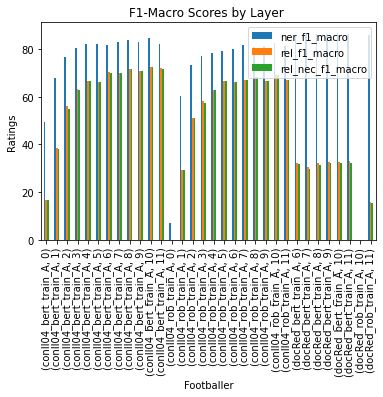

In [15]:

df[['ner_f1_macro','rel_f1_macro','rel_nec_f1_macro']].plot(kind='bar')
plt.title("F1-Macro Scores by Layer ")
plt.xlabel("Footballer")
plt.ylabel("Ratings")